In [11]:
import pandas as pd
data={'color':['r','g','b','r','b','b']}
df=pd.DataFrame(data)
df1=pd.get_dummies(df)
print(df1)

   color_b  color_g  color_r
0    False    False     True
1    False     True    False
2     True    False    False
3    False    False     True
4     True    False    False
5     True    False    False


In [12]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Load example data (Iris dataset)
iris = load_iris()
X, y = iris.data, iris.target

# Range of K values to try
k_values = range(1, 31)

# List to store cross-validation scores
cv_scores = []

# Perform cross-validation for each K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Determine the best K value
best_k = k_values[np.argmax(cv_scores)]

print(f"Best K value: {best_k}")

Best K value: 6


In [13]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Load example data (Iris dataset)
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Define the model
model = SVC()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Set up GridSearchCV
grid = GridSearchCV(model, param_grid, refit=True, cv=5, scoring='accuracy')

# Fit the model
grid.fit(X, y)

# Print the best parameters and the best score
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Score: {grid.best_score_}")

Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Best Score: 0.9800000000000001


In [14]:
import numpy as np
class perceptron:
    def __init__(self,inp,l=0.01,n=1000):
        self.w=np.zeros(inp)
        self.b=0
        self.l=l
        self.n=n
    def activation(self,x):
        return 1 if x>=0  else 0
    def predict(self,x):
        z=np.dot(x,self.w)+self.b
        return self.activation(z)
    def fit(self,X,y):
        for _ in range(self.n):
            for i in range(X.shape[0]):
                pred=self.predict(X[i])
                error=y[i]-pred
                self.w+=self.l*error*X[i]
                self.b+=self.l*error
X=np.array([[1,1],[1,0],[0,1],[0,0]])
y=np.array([1,0,0,0])
p=perceptron(inp=2,l=0.01,n=1000)
p.fit(X,y)
x_test=([1,1])
print(p.predict(x_test))

1


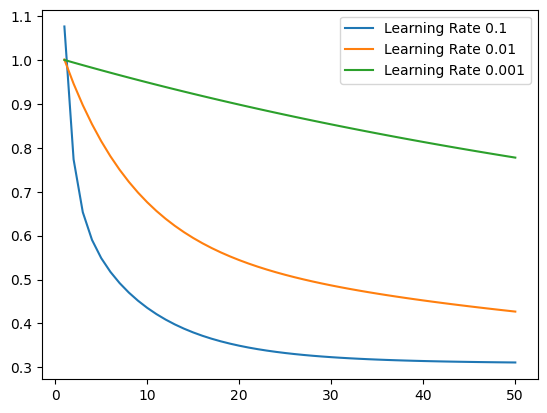

In [15]:
import numpy as np
import matplotlib.pyplot as plt
class adaline:
    def __init__(self,inp,l=0.01,e=100):
        self.w=np.zeros(inp)
        self.b=0
        self.l=l
        self.e=e
        self.errors=[]
    def activation(self,z):
        return z
    def predict(self,x):
        z=np.dot(x,self.w)+self.b
        return self.activation(z)
    def fit(self,X,y):
        for _ in range(self.e):
            error_epoch=0
            for i in range(X.shape[0]):
                prediction=self.predict(X[i])
                error=y[i]-prediction
                self.w+=self.l*error*X[i]
                self.b+=self.l*error
                error_epoch+=(error**2)
            self.errors.append(error_epoch)
if __name__ == "__main__":
    X=np.array([[1,1],[1,0],[0,1],[0,0]])
    y=np.array([1,0,0,0])
    lr=[0.1,0.01,0.001]
    e=50
    for r in lr:
        a=adaline(inp=2,l=r,e=e)
        a.fit(X,y)
        plt.plot(range(1,1+e),a.errors, label=f'Learning Rate {r}')
    plt.legend()
    plt.show()

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
iris=load_iris()
X=iris.data
y=iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


0.7777777777777778


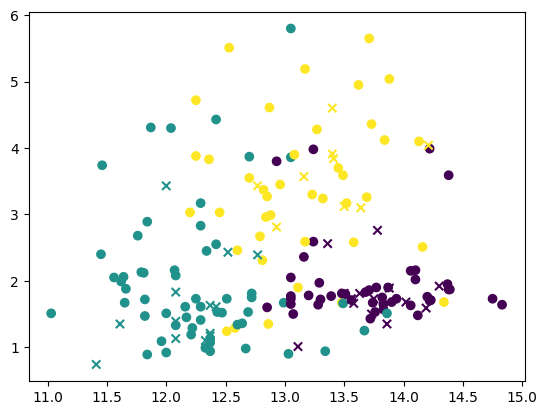

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
data=load_wine()
X=data.data[:,:2]
y=data.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
print(accuracy_score(y_test,y_pred))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,marker='o')
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred,marker='x')